In [5]:
using Plotly
using Random: seed!

using Kraft
using Plot

using GSEA

In [6]:
use_style!()

seed!(20121020)

;

In [7]:
element_, element_score_, set_element_ = make_benchmark("random 100")

(["e1", "e2", "e3", "e4", "e5", "e6", "e7", "e8", "e9", "e10"  …  "e91", "e92", "e93", "e94", "e95", "e96", "e97", "e98", "e99", "e100"], [-2.451278057206825, -2.050018554892582, -2.019326160422632, -1.8054909158247985, -1.7034536674882526, -1.6922987789544572, -1.6355163486626194, -1.3653781942402785, -1.2981639708263353, -1.2541701674224897  …  0.9783975253719258, 1.0985110777416849, 1.1526299532309838, 1.2389403938473273, 1.2884487944565048, 1.8042681544052632, 1.8416198336933554, 1.9293731236514446, 2.270705836939811, 2.593485337407844], ["e21", "e89", "e38", "e17", "e41", "e18", "e73", "e82", "e35", "e71"])

In [8]:
layout = Layout(xaxis_title = "Element", xaxis_tickvals = 1:length(element_), xaxis_ticktext = element_)

;

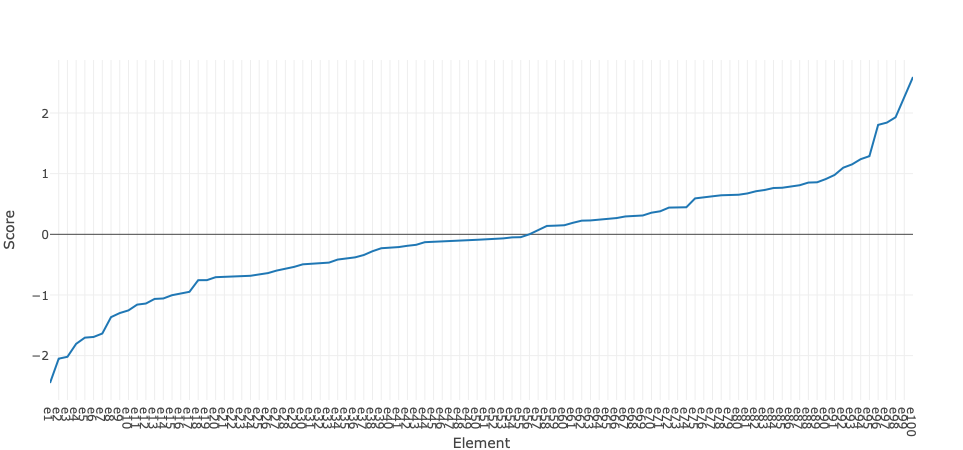

In [9]:
element_score_, element_ = sort_like((element_score_, element_))

plot_x_y((element_score_,); layout = merge(layout, Layout(yaxis_title = "Score")))

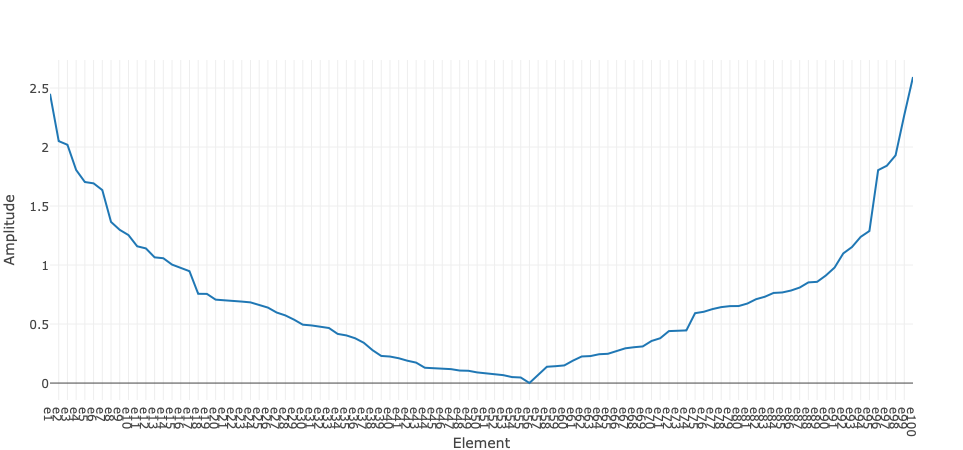

In [10]:
am_ = abs.(element_score_)

plot_x_y((am_,); layout = merge(layout, Layout(yaxis_title = "Amplitude")))

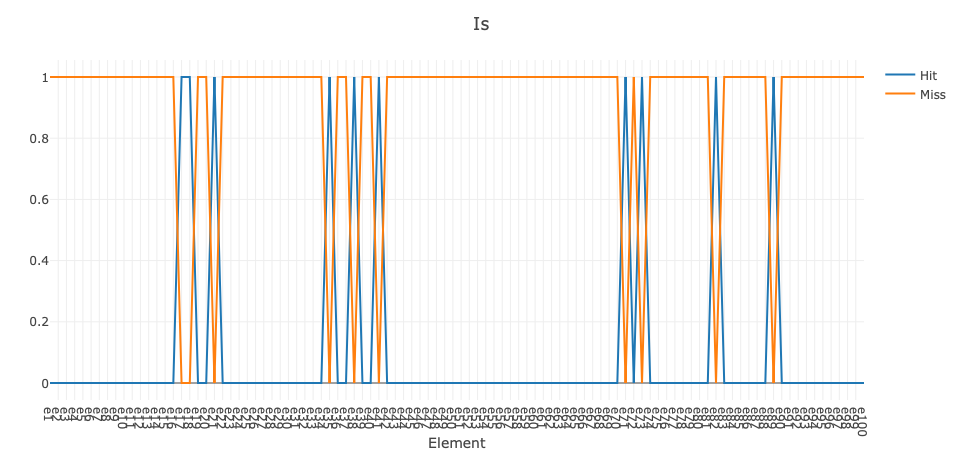

In [11]:
is_h_ = check_is(element_, set_element_)

is_m_ = 1.0 .- is_h_

plot_x_y((is_h_, is_m_); name_ = ("Hit", "Miss"), layout = merge(layout, Layout(title = "Is")))

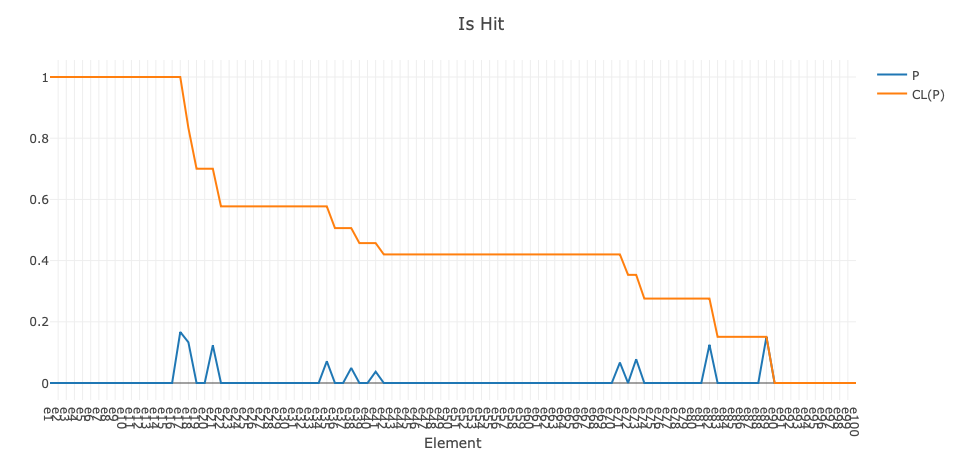

In [12]:
is_h_am_ = is_h_ .* am_

is_h_p_ = is_h_am_ / sum(is_h_am_)

is_h_p_cl_ = cumulate_sum_reverse(is_h_p_)

plot_x_y((is_h_p_, is_h_p_cl_); name_ = ("P", "CL(P)"), layout = merge(layout, Layout(title = "Is Hit")))

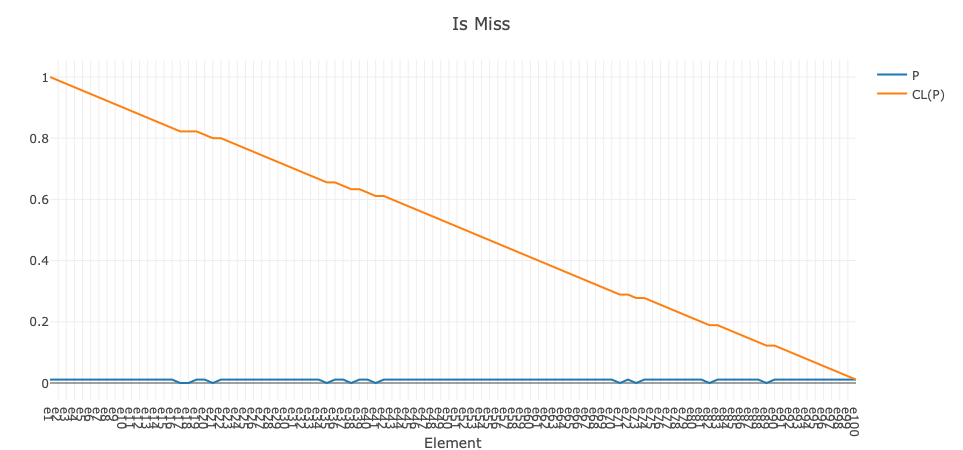

In [13]:
is_m_p_ = is_m_ / sum(is_m_)

is_m_p_cl_ = cumulate_sum_reverse(is_m_p_)

plot_x_y((is_m_p_, is_m_p_cl_); name_ = ("P", "CL(P)"), layout = merge(layout, Layout(title = "Is Miss")))

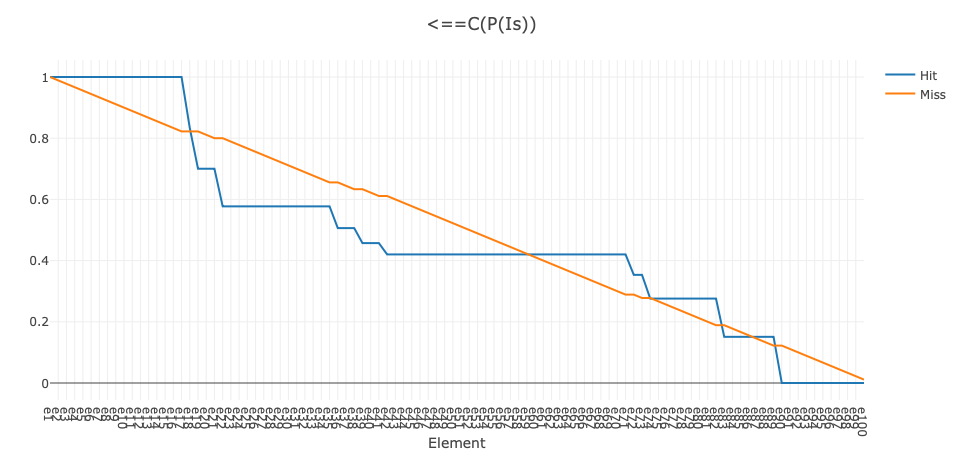

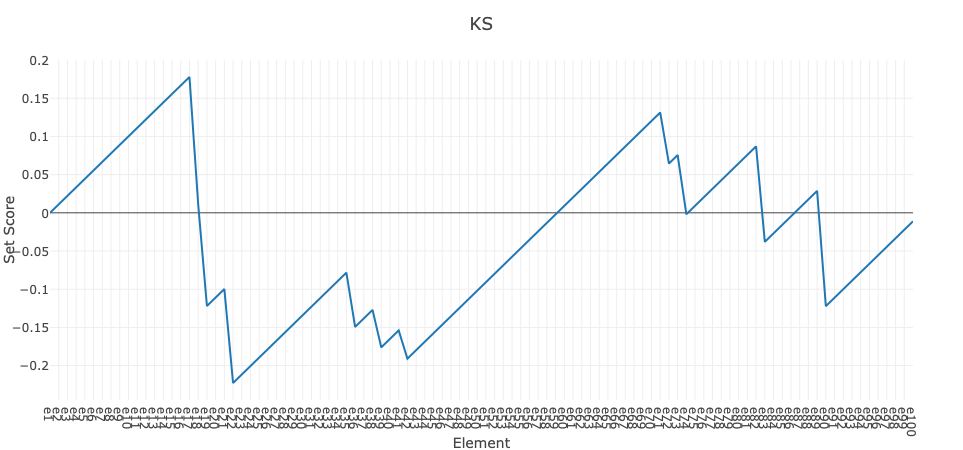

In [14]:
display(plot_x_y((is_h_p_cl_, is_m_p_cl_); name_ = ("Hit", "Miss"), layout = merge(layout, Layout(title = "<==C(P(Is))"))))

ks_ = is_h_p_cl_ - is_m_p_cl_

plot_x_y((ks_,); layout = merge(layout, Layout(title = "KS", yaxis_title = "Set Score")))

In [15]:
set_score_ = ks_

mi = minimum(set_score_)

ma = maximum(set_score_)

if abs(mi) < abs(ma)

    extreme = ma

else

    extreme = mi

end

area = sum(set_score_)

set_score_, extreme, area

([1.5543122344752192e-15, 0.011111111111112626, 0.022222222222223698, 0.03333333333333477, 0.04444444444444584, 0.05555555555555691, 0.06666666666666798, 0.07777777777777906, 0.08888888888889013, 0.1000000000000012  …  -0.11111111111111112, -0.1, -0.08888888888888889, -0.07777777777777778, -0.06666666666666667, -0.05555555555555556, -0.044444444444444446, -0.03333333333333333, -0.022222222222222223, -0.011111111111111112], -0.22278070133916794, -2.9657932668476503)